<a href="https://www.kaggle.com/code/kelvinquansah/overview-of-pricing-for-steam-games?scriptVersionId=135121762" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/steamgames/games.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
steam_data = pd.read_csv('/kaggle/input/steamgames/games.csv')


In [4]:
steam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71716 entries, 0 to 71715
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       71716 non-null  int64  
 1   Name                        71715 non-null  object 
 2   Release date                71716 non-null  object 
 3   Estimated owners            71716 non-null  object 
 4   Peak CCU                    71716 non-null  int64  
 5   Required age                71716 non-null  int64  
 6   Price                       71716 non-null  float64
 7   DLC count                   71716 non-null  int64  
 8   About the game              69280 non-null  object 
 9   Supported languages         71716 non-null  object 
 10  Full audio languages        71716 non-null  object 
 11  Reviews                     9167 non-null   object 
 12  Header image                71716 non-null  object 
 13  Website                     350

In [5]:
steam_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AppID,71716.0,1.199222e+06,598223.776787,10.0,700535.00,1176745.00,1692255.00,2379920.0
Peak CCU,71716.0,1.407612e+02,5797.005513,0.0,0.00,0.00,1.00,872138.0
Required age,71716.0,3.434938e-01,2.362128,0.0,0.00,0.00,0.00,21.0
Price,71716.0,7.223055e+00,11.072051,0.0,0.99,4.99,9.99,999.0
DLC count,71716.0,6.153857e-01,14.932853,0.0,0.00,0.00,0.00,2366.0
Metacritic score,71716.0,3.834207e+00,16.437707,0.0,0.00,0.00,0.00,97.0
User score,71716.0,4.496904e-02,1.901272,0.0,0.00,0.00,0.00,100.0
Positive,71716.0,1.114753e+03,26522.457248,0.0,1.00,9.00,59.00,5764420.0
Negative,71716.0,1.821155e+02,4975.205765,0.0,0.00,3.00,18.00,895978.0
Score rank,42.0,9.890476e+01,0.878178,97.0,98.00,99.00,100.00,100.0


In [6]:
steam_data['Release date'] = pd.to_datetime(steam_data['Release date'])

In [7]:
steam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71716 entries, 0 to 71715
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   AppID                       71716 non-null  int64         
 1   Name                        71715 non-null  object        
 2   Release date                71716 non-null  datetime64[ns]
 3   Estimated owners            71716 non-null  object        
 4   Peak CCU                    71716 non-null  int64         
 5   Required age                71716 non-null  int64         
 6   Price                       71716 non-null  float64       
 7   DLC count                   71716 non-null  int64         
 8   About the game              69280 non-null  object        
 9   Supported languages         71716 non-null  object        
 10  Full audio languages        71716 non-null  object        
 11  Reviews                     9167 non-null   object    

In [8]:
# get rid of 2023 because year has not ended yet and may disturb amalysis
# get rid of 2025 data

steam_data = steam_data[steam_data['Release date'] < "2023"]

In [9]:
steam_data.head()
steam_data['year'] = steam_data['Release date'].apply(lambda x: x.year)
steam_data['month'] = steam_data['Release date'].apply(lambda x: x.month)
steam_data['day'] = steam_data['Release date'].apply(lambda x: x.day)
steam_data['day']

0        21
1        12
2        17
3        23
4         3
         ..
70423    15
70612     8
70872     7
70889    30
71652    30
Name: day, Length: 68022, dtype: int64

[Text(0, 12.0, '2.0'),
 Text(0, 12.0, '1.0'),
 Text(0, 12.0, '3.0'),
 Text(0, 12.0, '2.0'),
 Text(0, 12.0, '4.0'),
 Text(0, 12.0, '1.0'),
 Text(0, 12.0, '3.0'),
 Text(0, 12.0, '7.0'),
 Text(0, 12.0, '7.0'),
 Text(0, 12.0, '69.0'),
 Text(0, 12.0, '102.0'),
 Text(0, 12.0, '166.0'),
 Text(0, 12.0, '329.0'),
 Text(0, 12.0, '297.0'),
 Text(0, 12.0, '281.0'),
 Text(0, 12.0, '350.0'),
 Text(0, 12.0, '483.0'),
 Text(0, 12.0, '1590.0'),
 Text(0, 12.0, '2620.0'),
 Text(0, 12.0, '4312.0'),
 Text(0, 12.0, '6182.0'),
 Text(0, 12.0, '7854.0'),
 Text(0, 12.0, '7614.0'),
 Text(0, 12.0, '9474.0'),
 Text(0, 12.0, '12308.0'),
 Text(0, 12.0, '13961.0')]

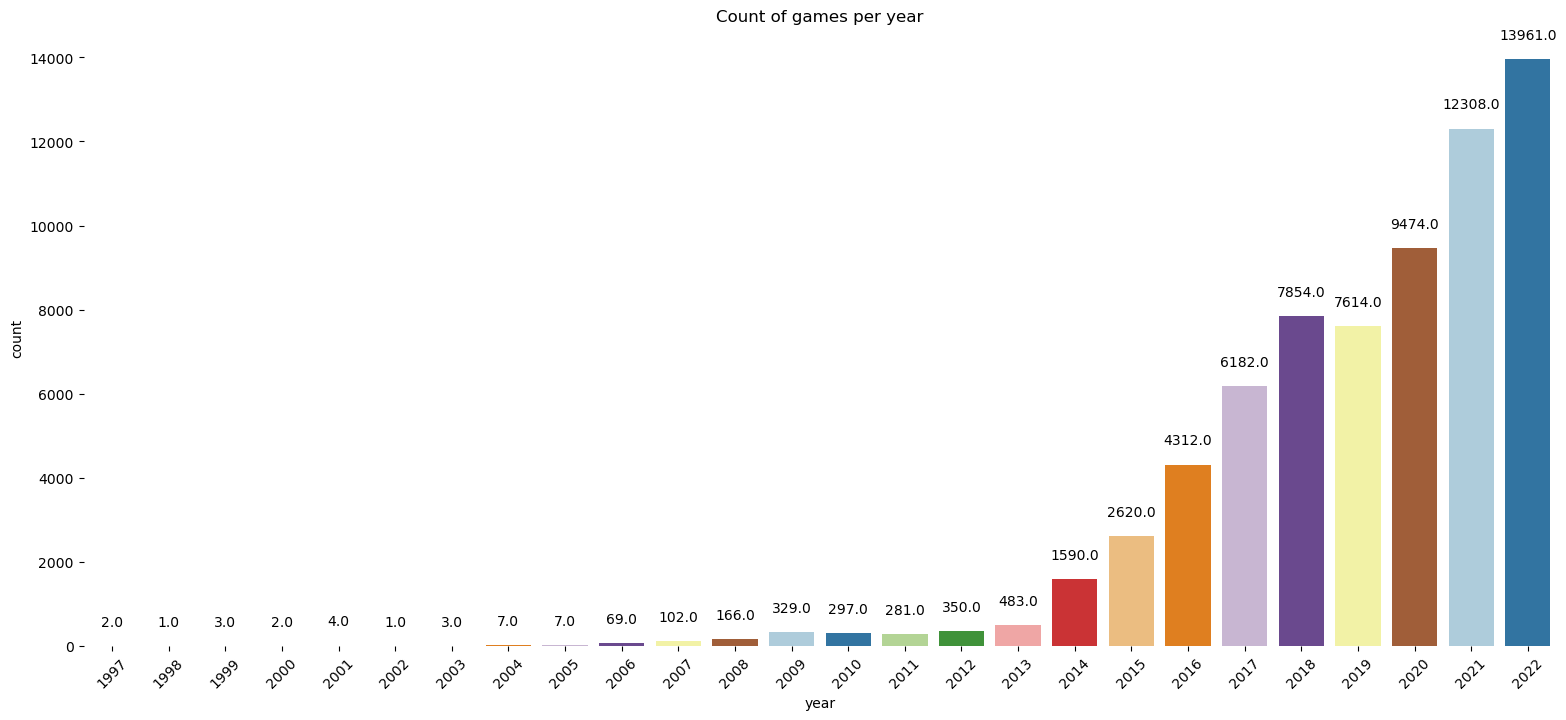

In [10]:
# lets see count of games per year
plt.figure(figsize=(19,8))
a =sns.countplot(x=steam_data['year'],palette="Paired")
plt.title("Count of games per year")
plt.xticks(rotation=45)
a.set(frame_on=False)
plt.bar_label(a.containers[0], fmt='%.1f',padding=12.0)


[None]

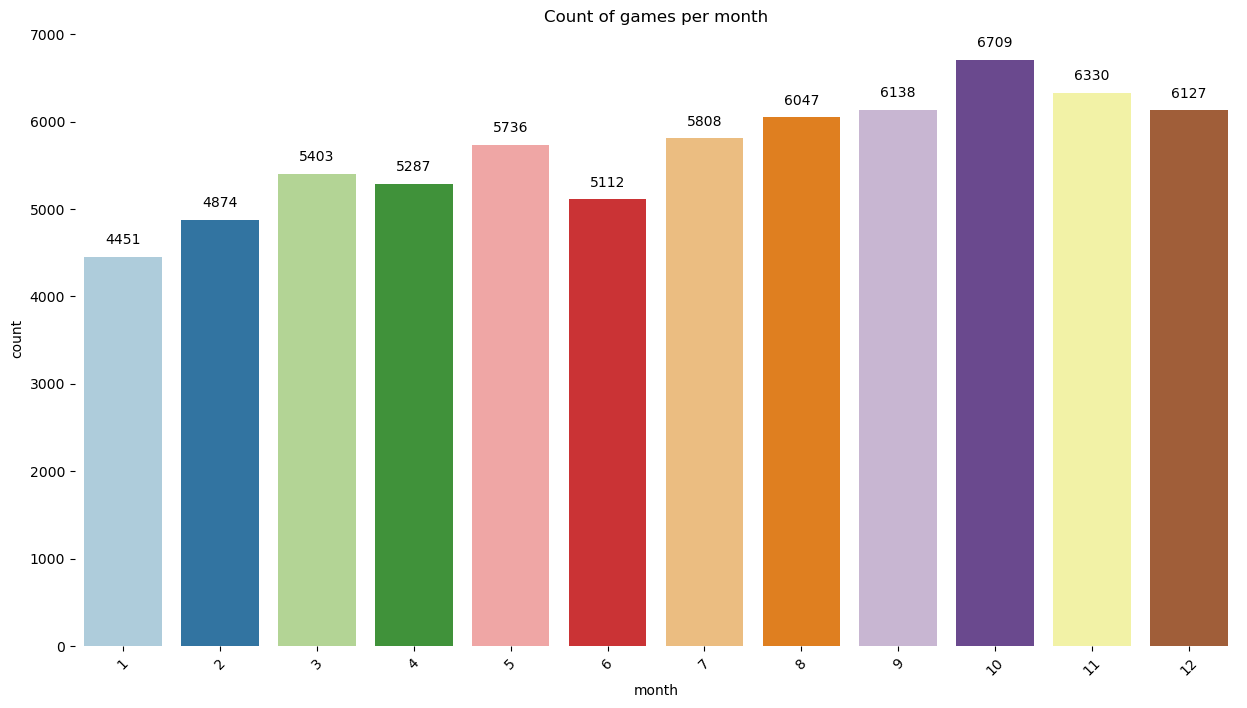

In [11]:
# lets see count of games per month
# October has the highest number of games released 
plt.figure(figsize=(15,8))
a= sns.countplot(x=steam_data['month'],palette="Paired")
plt.title("Count of games per month")
plt.xticks(rotation=45)
plt.bar_label(a.containers[0],padding=7.0)
a.set(frame_on=False)

[None]

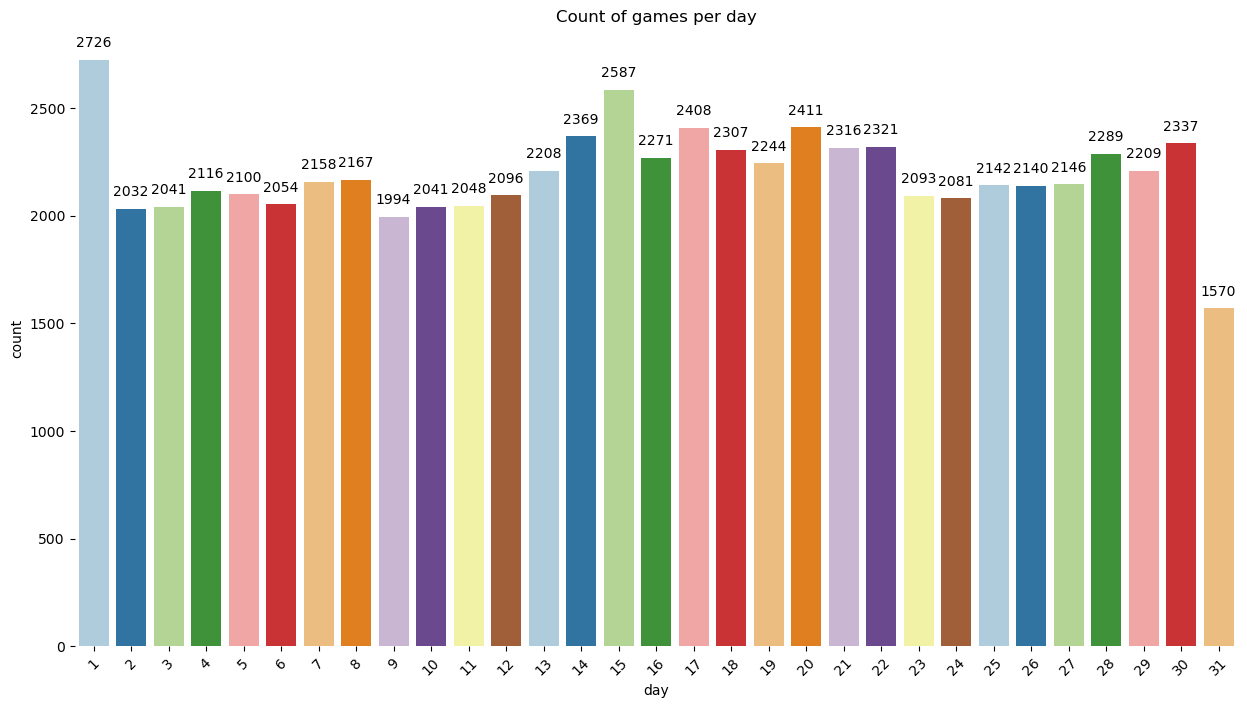

In [12]:
# lets see count of games per day
# 1st day of the month has the highest number of games released 
plt.figure(figsize=(15,8))
a = sns.countplot(x=steam_data['day'],palette="Paired")
plt.title("Count of games per day")
plt.xticks(rotation=45)
plt.bar_label(a.containers[0],padding=7.0)
a.set(frame_on=False)

[None]

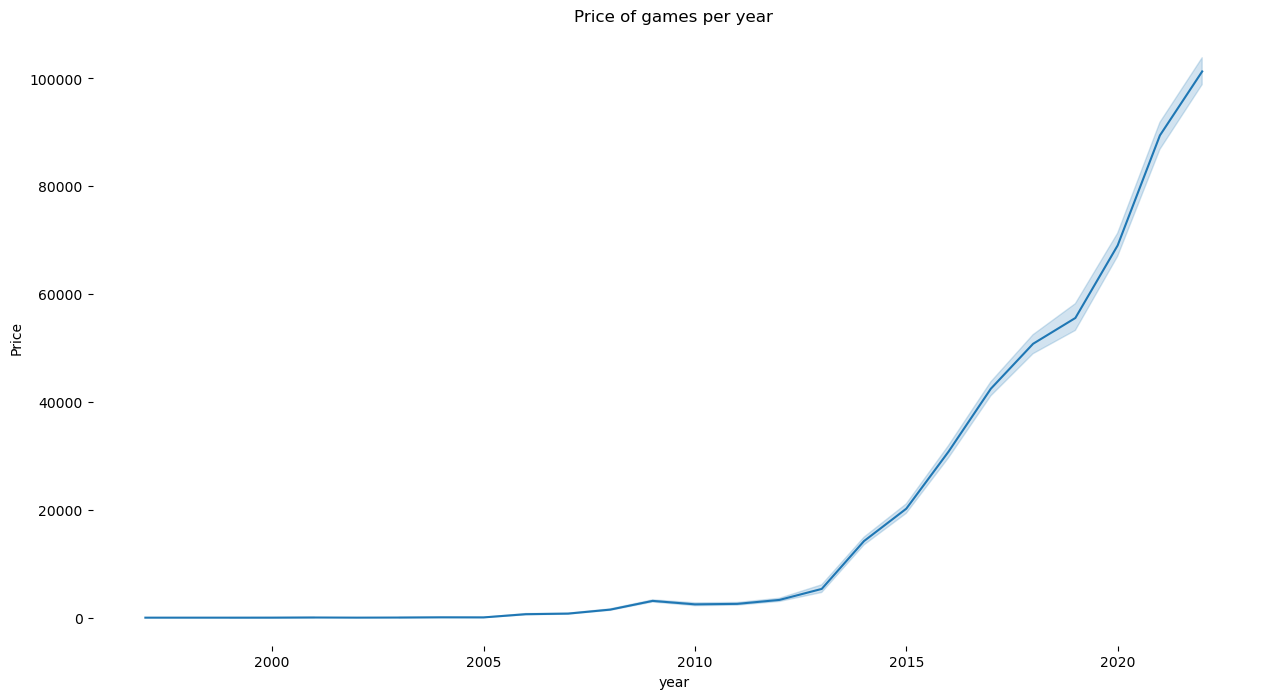

In [13]:
# lets see the total price of games per year
# Price has grown significantly since 2013
plt.figure(figsize=(15,8))
a = sns.lineplot(data=steam_data,x='year',y='Price',estimator='sum')
plt.title("Price of games per year")
a.set(frame_on=False)

[None]

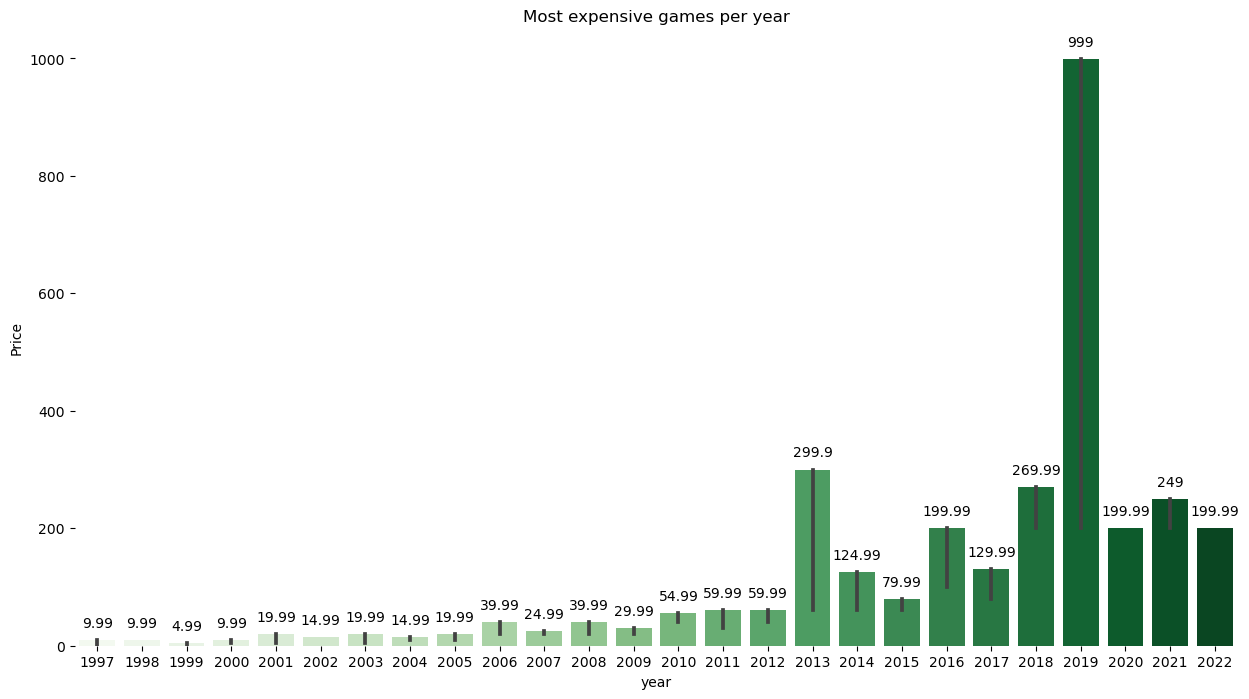

In [14]:
# lets see most expensive games for each year
# In 2019 we can see a game that cost $999 being the most expensive game ever created
plt.figure(figsize=(15,8))
a = sns.barplot(data=steam_data,x='year',y='Price',estimator='max',palette='Greens')
plt.bar_label(a.containers[0],padding=7.0)
plt.title("Most expensive games per year")
a.set(frame_on=False)

In [15]:
# let see the top 5 most expensive games and their price
steam_data = steam_data.sort_values('Price',ascending=False)
steam_data.head(5)[["Name","Price","year"]] 



,Name,Price,year
26936,Ascent Free-Roaming VR Experience,999.00,2019
57689,Aartform Curvy 3D 3.0,299.90,2013
32110,Houdini Indie,269.99,2018
12150,VEGAS 19 Edit - Steam Edition,249.00,2021
23459,Reincarnation of Ocean,199.99,2021


[None]

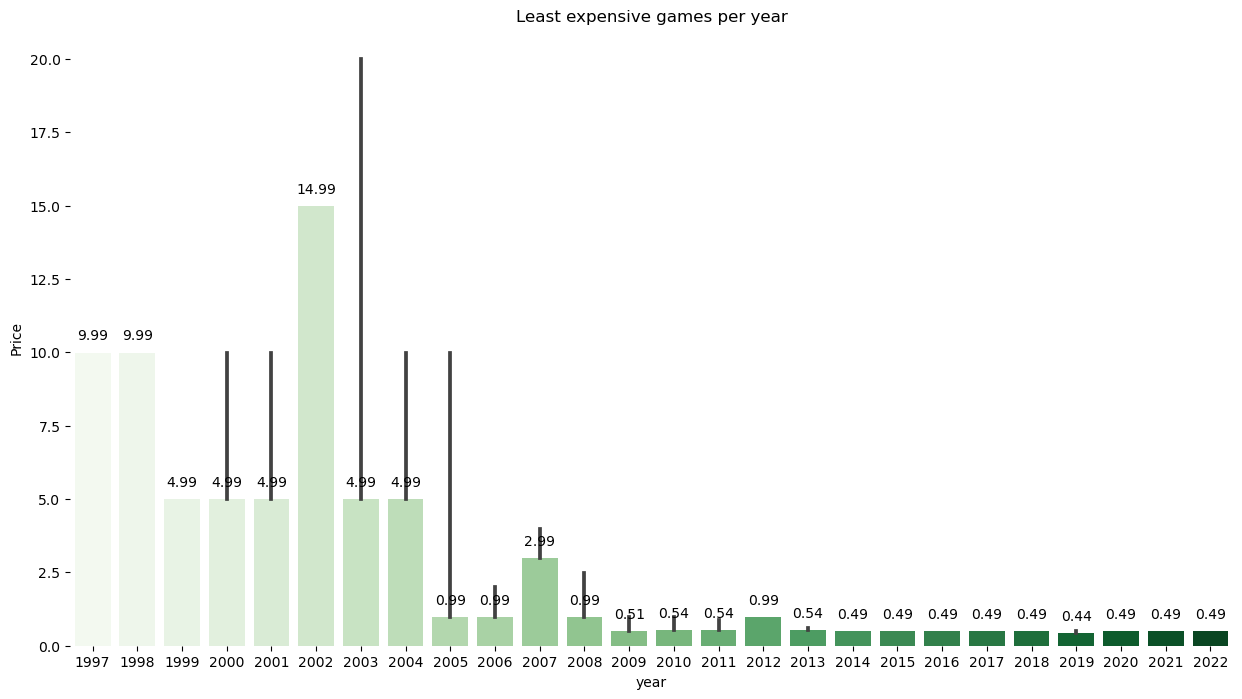

In [16]:
# lets see the least expensive games for each year excluding free games
# We can see a game that the least expensive game cost $0.49.
steam_no_free_games = steam_data.query('Price > 0')
plt.figure(figsize=(15,8))
a = sns.barplot(data=steam_no_free_games,x='year',y='Price',estimator='min',palette='Greens')
plt.bar_label(a.containers[0],padding=7.0)
plt.title("Least expensive games per year")
a.set(frame_on=False)